# Data Analysis Notebooks

This notebook combines data collection (scraping) and data preprocessing.

Steps:
1. Scape reviews from Google Play Store
2. Preprocess and clean the data
3. Visualize the results

## Import dependencies

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join('..')))

## Import modules

In [2]:
from src.scraper_reviews import PlayStoreScraper
from src.preprocess_reviews import DataCleaner
from src.config import PATHS

## Data Collection

In [3]:
# Scrape data from Google Play Store
scraper = PlayStoreScraper(count=500)
scraper.scrape()
scraper.save(f"../{PATHS['raw_data']}")

Scraping Commercial Bank of Ethiopia (com.combanketh.mobilebanking)...
Fetched 500 reviews.
Scraping Bank of Abyssinia (com.boa.boaMobileBanking)...
Fetched 500 reviews.
Scraping Dashen Bank (com.dashen.dashensuperapp)...
Fetched 500 reviews.
Raw data saved to ../data/raw/reviews_raw.csv


# Preprocessing

These are the steps that are done:
1. Rename Columns
2. Filter Columns
3. Drop Duplicates & Nulls
4. Normalize Date
5. Save file

In [7]:
cleaner = DataCleaner(f"../{PATHS['raw_data']}")
cleaner.load_data()
clean_df = cleaner.preprocess()
cleaner.save(f"../{PATHS['cleaned_data']}")
display(clean_df.head())
print(clean_df.columns)

Cleaning Complete. Dropped 235 rows.
Cleaned data saved to ../data/processed/reviews_cleaned.csv


,review,rating,date,bank,source
0,Make it user friendly.,2,2025-11-29,Commercial Bank of Ethiopia,Google Play
1,maaliif daddafee install gaafata,3,2025-11-28,Commercial Bank of Ethiopia,Google Play
2,good app,5,2025-11-28,Commercial Bank of Ethiopia,Google Play
3,This application is very important and advanta...,5,2025-11-27,Commercial Bank of Ethiopia,Google Play
4,why didn't work this app?,1,2025-11-27,Commercial Bank of Ethiopia,Google Play


Index(['review', 'rating', 'date', 'bank', 'source'], dtype='object')


# Visualization

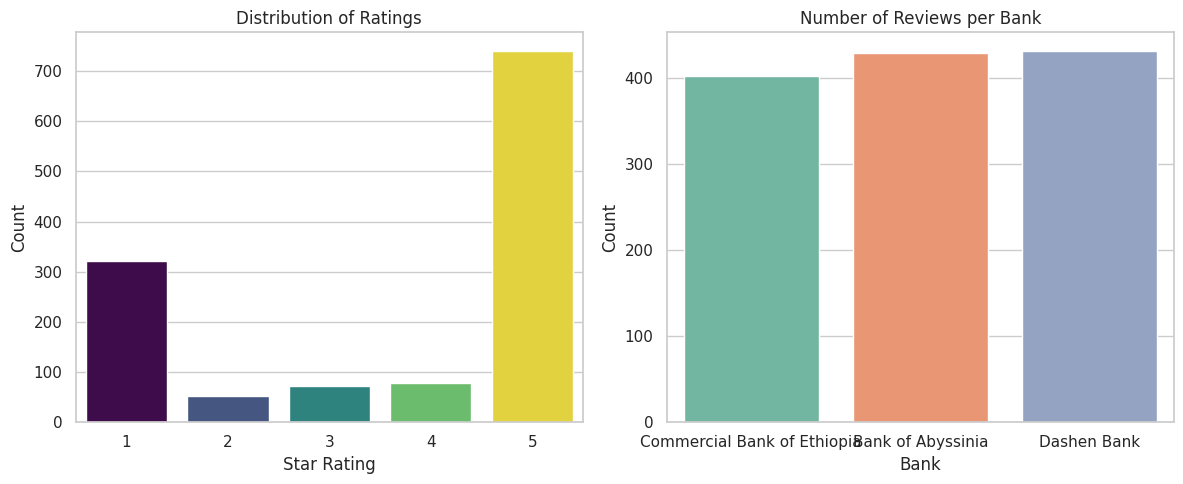

In [8]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=clean_df, palette='viridis', hue="rating", legend=False)
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank', data=clean_df, palette='Set2', hue="bank", legend=False)
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()